In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization


# Standard Lifecycle for any data science project to be followed

1. Domain Exploration
    * Understand the business process, how business functions
    * Identify few problems and the beleif based solutions
    * Identify opportunities where business relies on expertise of an SME.
2. Data Collection and Data Exploration
    * understand the data structure
    * Ask for data dictionary to the business
    * explore data to identify issues with data quality and patterns in general with in data
3. Data cleaning
    * handle unwanted columns
    * handle missing values
    * handle duplicate entries
    * handle outliers and un natural values
4. Feature Engineering
    * Feature Extraction
        * use data engieering and statistics to create new useful features from existing data
    * Feature Selection - select best features which are relevant to predict the label
        * EDA ( Exploratory Data Analytics ) using Data Visualization
        * EDA using statistics
        * Wrapper Methods
        * Embedded Methods
        * Filter methods
5. Preprocessing of data
    * encoding of data
    * scaling of features
    * splitting data into train and test sets
6. Apply ML to build a predictive model
    * Use a ML algorithm and train using train set
7. Performance Analysis - How good the model is?
    * check performance of model using train data and test data
8. Optimization & Tuning
    * improve the performance of the ML algorithm
9. Deploy the model to production
    * Export the model as a portable file
    * deploy it as REST service
10. Monitoring the perfomance of a model in production

In [2]:
# loading data
df = pd.read_csv() # path to file
df.shape

(3333, 21)

# 2. Data Exploration

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Oservation - 
* Voice mail plan and numer vmail messages seems to have similar information, as those who will be having voice mail plan will be having the value of number vmail messages higher than 0
* total day charges and total day minutes should be correlated as there would be a multiplier of per minute charge used to calculate total day charge from total day minutes, same also applied for total eve minutes, total night minutes and total internation mins
* Phone number, state and area code seems to be identifier so may not have any quantitative or qualittaive info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#checking the categories for object data types
print(df['international plan'].unique())
print(df['voice mail plan'].unique())

['no' 'yes']
['yes' 'no']


In [6]:
df.describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,386-1374,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


# 3. Data Cleaning

In [7]:

#check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### No Missing values observed

In [8]:

# check for duplicated rows
df.duplicated().sum()

0

#### No dulicated rows observed

In [9]:
# check for outliers
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

* Number vmail messages - we can take action while performing feature extraction
* Total intl class - we will take action during correlation analysis
* Customer service calls - the skew is almost 1, thus we can go ahead without an action

# 4. Feature Engineering
## Feature Extraction

In [11]:

df['number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64

In [12]:
df['number vmail messages'][df['number vmail messages']>0].describe()

count    922.000000
mean      29.277657
std        7.559027
min        4.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       51.000000
Name: number vmail messages, dtype: float64

In [38]:
# New categorical feature = 
                # if numofvmailmessage <1 = No VM plan
                # if numofvmailmessage >1 and <38 = Normal users
                # if numofvmailmessage >38 and <53= High Frequency users

In [39]:
df['vmail_messages'] = pd.cut(df['number vmail messages'],bins=[0,1,38,52],
                             labels=['No VM plan','Normal Users','High Frequency users'],
                             include_lowest=True)
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,vmail_messages
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Normal Users
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Normal Users
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,No VM plan
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,No VM plan
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,No VM plan
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,No VM plan
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,Normal Users
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,No VM plan
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,No VM plan
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,Normal Users


## Feature Selection

### Correlation Analysis

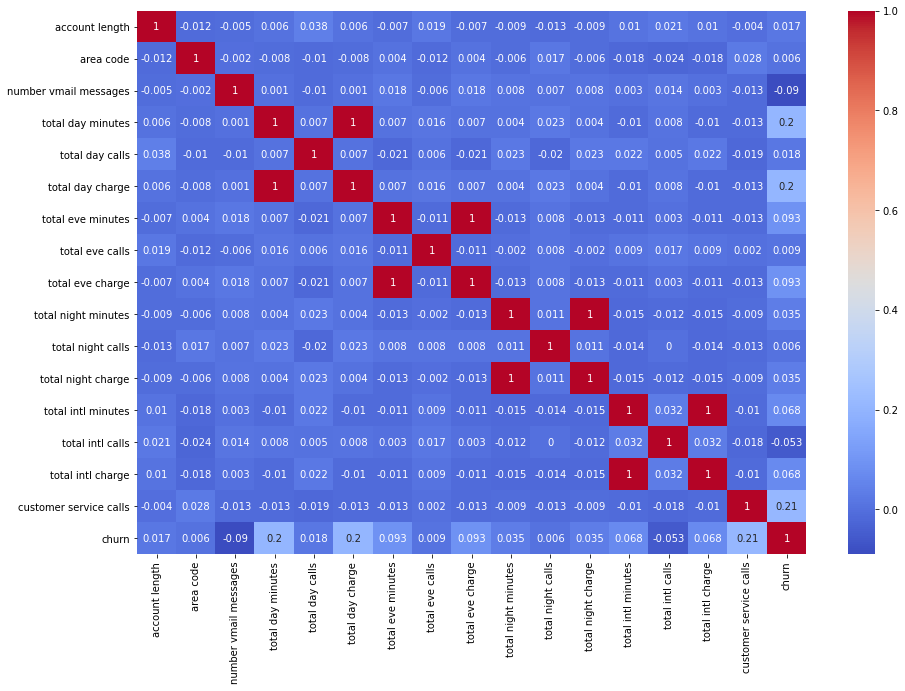

In [40]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()

Observation
* Total day minutes & total day charge - correlation 1 >> we can drop one of these
* Total eve minutes & total eve charge - correlation 1 >> we can drop one of these
* Total night minutes & total night charge - correlation 1 >> we can drop one of these
* Total intl minutes & total intl charge - correlation 1 >> we can drop one of these

# 5. Preprocessing

In [45]:
x.head()

,international plan,vmail_messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls
0,no,Normal Users,265.1,197.4,244.7,10.0,1
1,no,Normal Users,161.6,195.5,254.4,13.7,1
2,no,No VM plan,243.4,121.2,162.6,12.2,0
3,yes,No VM plan,299.4,61.9,196.9,6.6,2
4,yes,No VM plan,166.7,148.3,186.9,10.1,3


#### encoding categorical features

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0]),
                                 ('sc',StandardScaler(),[2,3,4,5,6])],remainder='passthrough')

In [48]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.566767,-0.070610,0.866743,-0.085008,-0.427932
1,0.0,0.0,1.0,0.0,-0.333738,-0.108080,1.058571,1.240482,-0.427932
2,0.0,1.0,0.0,0.0,1.168304,-1.573383,-0.756869,0.703121,-1.188218
3,0.0,1.0,0.0,1.0,2.196596,-2.742865,-0.078551,-1.303026,0.332354
4,0.0,1.0,0.0,1.0,-0.240090,-1.038932,-0.276311,-0.049184,1.092641


In [49]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


# 6. Apply Machine Learning algorithm - Logistic regression¶

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(xtrain,ytrain)


LogisticRegression(class_weight='balanced')

# 7. Performance Analysis

In [52]:
# performance analysis
from sklearn import metrics
ypred = model.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred))
print("Recall : ",metrics.recall_score(ytest,ypred))
print("F1 score : ",metrics.f1_score(ytest,ypred))
print("Precision : ",metrics.precision_score(ytest,ypred))

Accuracy :  0.775112443778111
Recall :  0.7934782608695652
F1 score :  0.4932432432432432
Precision :  0.35784313725490197


In [53]:
# performance analysis on train data
ypred2 = model.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.764066016504126
Recall :  0.7570332480818415
F1 score :  0.4848484848484849
Precision :  0.3566265060240964


### Observation - Recall is not satisfactory
So we will now try other algorithms

# 8. Optimization and Tuning


1. At the data level
    * Extract more features
    * collect more data - features / samples
    * perform better preprocessing
    * improve feature selection process - drop irrelevant features
2. At the modelling level
    * Tune the hyperparameters of the algorithm to improve its performance
    * Change the ML algorithm used for modelling
    * combine multiple algorithms to make predictions

## Decision Tree Classifier

In [55]:
# preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0])],
                                remainder="passthrough")
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,265.1,197.4,244.7,10.0,1.0
1,0.0,0.0,1.0,0.0,161.6,195.5,254.4,13.7,1.0
2,0.0,1.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0
3,0.0,1.0,0.0,1.0,299.4,61.9,196.9,6.6,2.0
4,0.0,1.0,0.0,1.0,166.7,148.3,186.9,10.1,3.0
...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,156.2,215.5,279.1,9.9,2.0
3329,0.0,1.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0
3330,0.0,1.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0
3331,0.0,1.0,0.0,1.0,213.8,159.6,139.2,5.0,2.0


In [56]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


In [57]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=5,class_weight={0:0.5,1:0.5})
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=5)

### Visualizing the tree model

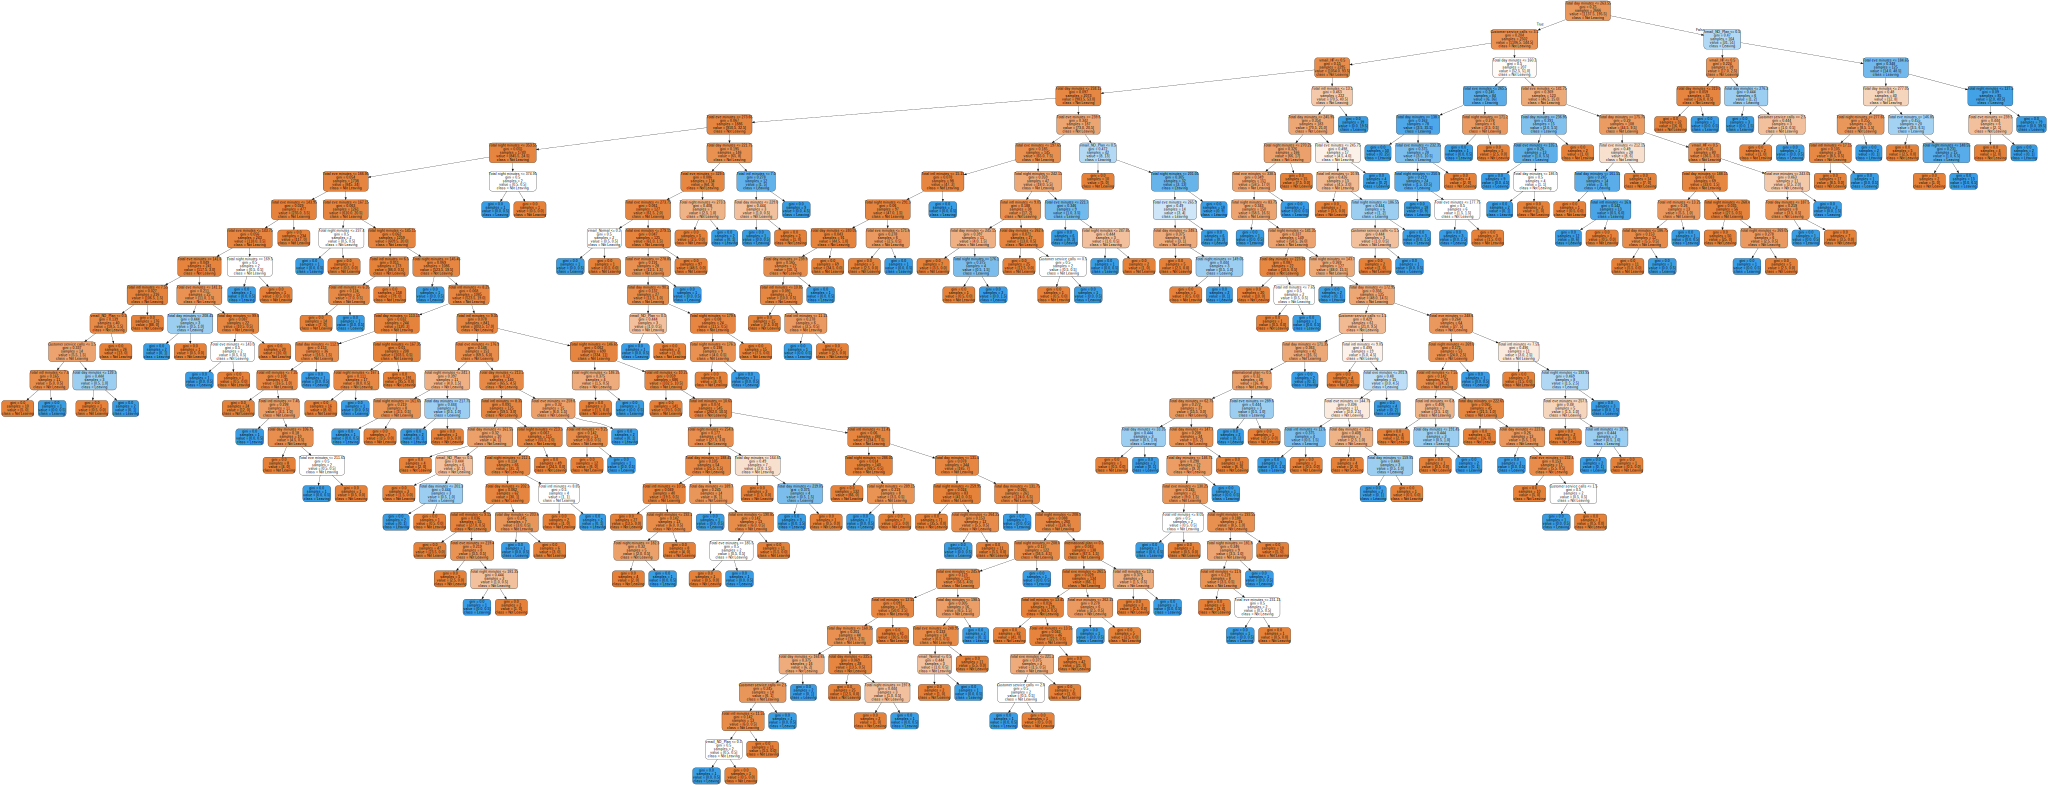

In [60]:
import graphviz
from sklearn import tree

fname = ['International plan', 'vmail_NO_Plan','vmail_Normal','vmail_HF', 'Total day minutes',
       'Total eve minutes', 'Total night minutes', 'Total intl minutes',
       'Customer service calls']
cname = ['Not Leaving','Leaving']
graphdata = tree.export_graphviz(model2,feature_names=fname,class_names=cname,
                                filled=True,rounded=True)
graph = graphviz.Source(graphdata)
graph


In [58]:
# performance analysis
ypred2 = model2.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.8995502248875562
Recall :  0.7391304347826086
F1 score :  0.6699507389162561
Precision :  0.6126126126126126


In [59]:

# performance analysis on train data
ypred2 = model2.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  1.0
Recall :  1.0
F1 score :  1.0
Precision :  1.0


## Overfitting

`performance of model on test data = low`

`performance of model on train data = high`

**Reasons for overfitting**
- Noisy features or noisy data
- lack of data - lack of number of observations/rows
- features are having very complex/nonlinear relation with label
- the algorithm used is very complex/nonlinear


**Ways to handle overfitting situation**
- drop noisy/irrelevant features
- keep the features simple, may be convert the numeric to categorical
- collect more data - more rows, NO BENEFIT from collecting more features
- Try a less complex algorithm
- In case of decision tree, decrease the value of max_depth, increase min_samples_leaf and min_samples_split


## Underfitting
`performance of model on test data = low`

`performance of model on train data = low`


**Reasons for underfitting**
- lack of informative features
- lack of a powerful algorithm, as the existing features may have silghtly complex/nonlinear relation with the target and the current algorithm is not able to learn
- presence of noisy observations


**Ways to handle underfitting situation**
- colllect/ create more features, perform feature extraction
- collect more columns, NO BENFIT from collecting rows
- Try a more powerful/complex predictive algorithm
- In case of deicision tree, increase the value of max_depth, decrease the value of min_samples_leaf and min_samples_split
- perform better data cleaning, handling outliers etc.

## Best fitting

`performance of model on test data = high`

`performance of model on train data = high`

## Hyperparameter Tuning for decision tree using Gridsearch

In [64]:
param_grid = {"max_depth":np.arange(3,25,2),
              "min_samples_leaf":np.arange(3,50,2),
              "min_samples_split":np.arange(10,120,5)}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=5),
                          param_grid=param_grid,n_jobs=-1,
                          scoring='recall',verbose=True,cv=5)
grid_search.fit(x_new,y)

Fitting 5 folds for each of 5808 candidates, totalling 29040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 6380 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 11980 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 19180 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 27980 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 29040 out of 29040 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]),
                         'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'min_samples_split': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115])},
             scoring='recall', verbose=True)

In [65]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6708762886597939
{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [61]:
# Controlling overfitting
model2 = DecisionTreeClassifier(criterion='gini',random_state=5,
                               max_depth=8,min_samples_leaf=5,min_samples_split=20)
model2.fit(xtrain,ytrain)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=20,
                       random_state=5)

In [62]:
# performance analysis On test data
ypred2 = model2.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.9430284857571214
Recall :  0.7065217391304348
F1 score :  0.7738095238095237
Precision :  0.8552631578947368


In [63]:
# performance analysis on train data
ypred2 = model2.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.9471117779444861
Recall :  0.6956521739130435
F1 score :  0.7941605839416058
Precision :  0.9251700680272109


### Feature importances

In [67]:
model2.feature_importances_
for i in range(len(fname)):print(fname[i],model2.feature_importances_[i])

International plan 0.0
vmail_NO_Plan 0.07957197040961295
vmail_Normal 0.0
vmail_HF 0.1034922637532645
Total day minutes 0.35860654052548413
Total eve minutes 0.1721940195076953
Total night minutes 0.04746707503384585
Total intl minutes 0.08934222663734767
Customer service calls 0.1493259041327496



## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=100,random_state=5,
                               max_depth=8,oob_score=True)
#train the model
model4.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=8, oob_score=True, random_state=5)

In [69]:
# performance analysis On test data
ypred2 = model4.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.9445277361319341
Recall :  0.6521739130434783
F1 score :  0.7643312101910829
Precision :  0.9230769230769231


In [70]:
# performance analysis on train data
ypred2 = model4.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.959489872468117
Recall :  0.7237851662404092
F1 score :  0.8397626112759643
Precision :  1.0


In [71]:
#check OOB (out of bag) score
model4.oob_score_

0.9358589647411854